# Support Vector Machines

## Use cases of SVM

- Classification, regression (time series prediction), **outlier detection**, and clustering

Outlier detection could be extremely useful for security. If you have a dataset of login attempts from users at a given IP address, an SVM could detect if the user signed in from a different location, because that login would be an outlier.

Outlier detection can also be usful for fraud detection. Detecting purchases that are outliers to the current dataset. If you leave the country, state, or make a purchase over a certain amount, it would produce an outlier, and a SVM would be able to detect that.

SVMs represent the mapping between the labels and the data provided. Once a ML Model has learned the relationship between the label and the data, we can use the trained SVM to detect various different things from the list above, by outputting its prediction.

## Differences between SVMs and Artificial Neural Networks

An SVM takes a set of data and tries to separate that data by a margin line provided by the user. SVMs are better for smaller datasets, 1000 datapoints or less, as a SVM can work well with less data to train with.

An Artificial Neural Network or Random Forest, per say, need a much larger training dataset, but end up with a much better trained model than an SVM. It's all dependent on your dataset size. In AI and most of life, "It all depends".

Choosing a SVM over a Artificial Neural Network requires a deep understanding of the problem at hand, as well as how much training data you have.

![SVM](https://qph.ec.quoracdn.net/main-qimg-fe4f8ca744a8d7030cf0ad0b5d9c3cac?raw=true)



## Inner Workings of SVMs

SVMs work by trying to build a hyperplane by maximizing the space between the dataset classes. Using the support vectors "class points" and SVM finds the closest support vectors to create the biggest margin between the two classes. Support vectors support the creation of the SVMs hyperplane. An SVM wants to draw a hyperplane that is in the direct middle of the two classes of data. An SVM does this because when a new data point is introduced, it will have the maximum likelyhood of falling into one of the two classes of data. Drawing a line of best classification will have the best chance of creating an accurate model.

An SVM tries to find the optimal function to relate two or more sets of data, like in all other machine learning algorithms. Optimization is the goal, whether it be Gradient Descent, or Newtons Method, etc.

## SVM Properties

An SVM's hyperplane is a decision surface. A hyperplane that operates in **R<sup>n</sup>** is an *n-1* dimensional subspace

If we were to have a 300, or 400 dimensional space, which is common in machine learning, A hyperplane operating in **R<sup>400</sup>** would be a 399 dimensional subspace. Machines, unlike humans can easily conceptualize more than 3 dimensions. It is hard for humans to conceptualize any dimension more than 3. The 4th dimension, often theorized in Physics, has time as its 4th axis, which blows our tiny minds. Computers do not have that problem. Dimensions are easy, as they are represented mathematically, and in binary when it comes time to hit the silicon.

## Scope for this demo

The scope for this SVM demo will only be linear classification, as non-linear classification is much more difficult.

**Linear Classification**
![Linear Classification](http://www.statsoft.com/textbook/graphics/SVMIntro3.gif)

**vs**

**Non-Linear Classification**
![Non-Linear Classification](https://www.researchgate.net/profile/Catarina_Moreira2/publication/260283043/figure/fig13/AS:297261608259591@1447884098165/Figure-A15-The-non-linear-SVM-classifier-with-the-kernel-trick.png)

## Creating a demo SVM

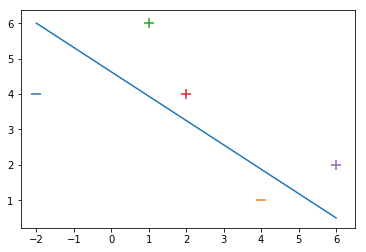

In [2]:
# In order to perform matrix math and make our lives easier, we will import numpy
import numpy as np
# Importing MatPlot Lib will make it so that we can plot data in 2D (or 3D space, but not for this project)
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1 - Define our data

# Out sample input data in R^2. Of the form: [X value, Y value, Bias Term]

# For now we will set the bias to -1 for this demo


X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

# Associated output labels - First 2 examples are labeled '-1' and last 3 are '1'

Y = np.array([-1,-1,1,1,1])

# we're going to plot the examples we've created on a 2D graph

# for each example we have:
for d, sample in enumerate(X):
    # We are going to plot the negative samples, aka the first 2
    
    if d < 2:
        # create a scatter plot with our data
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    
    # now plot the positive samples, in this case, the last 3
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane that is seperating the two classes
# we'll plot two points and draw a line between them as a naive guess
plt.plot([-2, 6], [6, 0.5])
        

## Error Function

Cool. We've created a little line that is the little guess of what the hyperplane should be. We need to take a look at some errors though, as this is not entirely correct.

In this case, we're using the [Hinge Loss](https://en.wikipedia.org/wiki/Hinge_loss) function. It is used in SVMs and is a "maximum-margin" classifier. It's also used for training classifiers.

![](https://camo.githubusercontent.com/037d9b87e5f7049bf61268e7ab27caa3345d1972/687474703a2f2f692e696d6775722e636f6d2f4f7a43777a794e2e706e67)

c is the loss function, x is the sample, and y is the true label, f(x) is the predicted label

![](https://camo.githubusercontent.com/c971927c2a57b8dcd7e8dc6a1fee81eaa10b9a63/687474703a2f2f692e696d6775722e636f6d2f465a374a6347332e706e67)

## Objective Function
![](https://camo.githubusercontent.com/56e9ded32847a76adb327f31ca9580cd2d5b1d05/687474703a2f2f692e696d6775722e636f6d2f49354e4e7534342e706e67)

Our objective function is our regularizer and our loss function

Our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term is the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

To minimize our loss, and optimize our function, we will use the handy dandy 1st order optimization function, Gradient Descent. We have two terms, deriving them seperatly using the sum run in differentiation.
![](https://camo.githubusercontent.com/03ab7412dff32425b1b2bec970a2da39c7e96a6e/687474703a2f2f692e696d6775722e636f6d2f36754b33426e482e706e67)


It so happens that using our objective function can produce a missclassification error. If we meet our misclassification condition, we are going to update our weights to correct for the issue.

Misclassification condition

![](https://camo.githubusercontent.com/20d970c162f691f54b1797b77b58449b172bc59f/687474703a2f2f692e696d6775722e636f6d2f6739514c41796e2e706e67)

Update rule for our weights (misclassified)

![](https://camo.githubusercontent.com/fbb72e96572184e6ea966da28431067694b7a20c/687474703a2f2f692e696d6775722e636f6d2f726b645070545a2e706e67)

including the learning rate η and the regularizer λ The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
* If the learning rate is too high, the algorithm might overshoot the optimal point
* If the learning rate is too low, it could take too long to converge, or not even converge at all

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.

* If the regularizer is too high, it is overfit ( large testing error )
    * It won't generalize well to new data points
* If the regularizer is too low, it is underfit ( also large testing error )
    * It will be too generalized to parse new data correctly

So we need to update our weights, which follows this rule:

![](https://camo.githubusercontent.com/dc310263c6a79f590c7c3043ee077738479c9668/687474703a2f2f692e696d6775722e636f6d2f78544b62765a362e706e67)

In [10]:
# we are going to perform stochastic gradient descent to learn the seperating hyperplane

def svm_sgd_plot(X,Y):
    # Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    
    # define our learning rate
    eta = 1
    
    # we want to set how many iterations to train for
    epochs = 100000
    # store our misclassifications so we can plot how they change over time
    errors = []
    
    # Our training part, using gradient descent
    
    #loop through each iteration starting at 1, as the objective function instructs us to do
    for epoch in range(1, epochs):
        # set the error to 0 by default
        error = 0
        
        # loop through the datapoints we're given
        for index, x_value in enumerate(X):
            # time to calculate if we have a misclassification
            if (Y[index] * np.dot(X[index], w)) < 1:
                # we misclassified, we need to update our weights
                w = w + eta * ( (X[index] * Y[index]) + (-2 * (1/epoch) * w) )
                
                # make sure we say that we encountered an error
                error = 1
                
            else:
                # so we encountered a correct classification, we need to update our weights accordingly
                w = w + eta * (-2 * (1/epoch) * w)
                
            # append our error variable to our errors list
            errors.append(error)
    
    # after we've finished our classification, AKA our Machine Learning Part, we are going to have to plot our data
    
    plt.plot(errors, '|')
    # set our y limit
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel("Epoch")
    plt.ylabel("Misclassified")
    plt.show()
    
    # return our weight that has been updated by the function
    return w
        

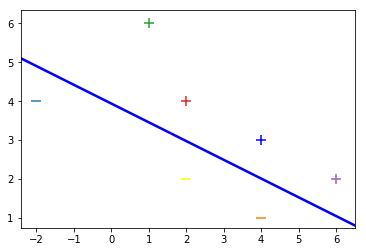

In [12]:
# we're going to do some plotting here

# for plotting some our sample data, X, we can just reuse the function we used at the top of this document
for d, sample in enumerate(X):
    # We are going to plot the negative samples, aka the first 2
    
    if d < 2:
        # create a scatter plot with our data
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    
    # now plot the positive samples, in this case, the last 3
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# now we want some new data, so we're going to add some of our own test samples

plt.scatter(2, 2, s=120, marker="_", linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker="+", linewidths=2, color='blue')

# print out our hyperplane calculated by svm_sgd_plot()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2,x3])

X,Y,U,V = zip(*x2x3)

ax = plt.gca()
ax.quiver(X,Y,U,V, scale=1, color='blue')


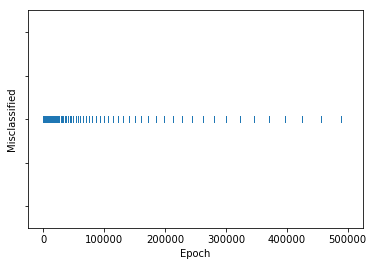

In [11]:
w = svm_sgd_plot(X,Y)

## Correct Classification

As you can see, the data has been correctly classified, and our hyperplane looks optimal!

As the graph above shows, the misclassification greatly reduces as the epochs increase. The machine gets better with time, and in only 100,000 iterations.